In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

In [2]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

In [3]:
path="../FirstFeatureExtraction/Models/tiny_polyDB_complete.pkl"
data=pd.read_pickle(path)

'''
data=data.drop(columns=[2,7,12,17,22,27]) #DROP T0      <-----------|

data=data.drop(columns=[3,8,13,18,23,28]) #DROP TFALL
data=data.drop(columns=[4,9,14,19,24,29]) #DROP TRISE
data=data.drop(columns=[1,6,11,16,21,26]) #DROP B
'''

X_train,X_test,y_train,y_test=train_test_split(data,data['target'],test_size=0.5,random_state=2)
classes=data['target'].unique()
print('Here are all the classes contained in the data sample :',classes)
data

Here are all the classes contained in the data sample : [ 90  42  67  88  15  95  52  62 994]


,object_id,target,0,1,2,3,4,5,6,7,8,9,10,11
0,745,90,0.024734,-22.012846,4897.324696,0.016554,-15.281943,3539.926816,0.014781,-13.706872,3189.952834,0.007986,-7.952650,1958.362389
1,1920,90,-0.017271,13.493650,-2487.505350,-0.030588,25.580169,-5199.735582,-0.027598,23.173115,-4733.835313,0.008193,-8.563964,2258.149992
2,2103,42,-0.112749,108.223919,-25838.238579,-0.059112,56.768146,-13507.794423,-0.103283,99.724482,-23941.247040,-0.135939,130.514593,-31197.662827
3,2922,67,0.033929,-31.266551,7197.116313,0.059100,-54.303030,12452.679307,0.053496,-49.424027,11406.693241,0.102135,-88.116862,19027.586668
4,3285,42,-0.200921,333.185214,-138007.012256,-0.151689,252.243019,-104754.696362,-0.171173,284.702779,-118267.393132,-0.195051,324.481430,-134832.225154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,128698604,994,-0.009068,2.579725,-5.822678,-0.001624,0.682325,11.519542,-0.014950,6.287869,-345.496372,-0.003550,1.274033,156.553170
1076,129459600,994,-0.007979,12.561572,-4870.659734,-0.012604,19.893440,-7716.334629,-0.013993,22.390235,-8781.828579,-0.025082,40.143602,-15830.330827
1077,129568338,994,-0.002111,1.132741,-22.015479,-0.002590,1.746353,-103.641668,-0.003295,2.466173,-236.534502,-0.002599,1.811352,-71.935619
1078,129628489,994,0.000400,-0.493899,111.504145,-0.001100,-0.214648,182.478701,-0.003063,0.479849,191.419240,-0.002285,0.289236,217.705966


The parameter t0 of the Bazin's model should carry no informations since there is a symmetry by time translation. We can get rid of it.

In [4]:
model=RandomForestClassifier()
forst = model.fit(X_train, y_train)

In [5]:
#On récupère l'array de toute les probas d'appartenir à chaque classe pour chaque individu
proba_train=forst.predict_proba(X_train)
predic_train=forst.predict(X_train)

print('Here is the probabilities to belong in each class for the first five objects :\n',proba_train[0:5])
print('\nHere is the attributed classes for the first five objects :\n',predic_train[0:5])

good_prediction_train=y_train==predic_train
accuracy_train=good_prediction_train.sum()/len(good_prediction_train)
print('\nThis model has an accuracy of %.2f %% on the training sample'%(accuracy_train*100))

Here is the probabilities to belong in each class for the first five objects :
 [[0.   0.02 0.   0.01 0.   0.01 0.84 0.11 0.01]
 [0.   0.   0.   0.   0.   0.05 0.   0.   0.95]
 [0.   0.   0.03 0.01 0.   0.03 0.92 0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.09 0.01 0.8  0.01 0.   0.07 0.02 0.  ]]

Here is the attributed classes for the first five objects :
 [ 90 994  90 994  62]

This model has an accuracy of 100.00 % on the training sample


In [6]:
#Now let us test our model on the testing sample

proba_test=forst.predict_proba(X_test)
predic_test=forst.predict(X_test)

good_prediction_test=y_test==predic_test
accuracy_test=good_prediction_test.sum()/len(good_prediction_test)
print('\nThis model has an accuracy of %.2f %% on the testing sample'%(accuracy_test*100))


This model has an accuracy of 92.22 % on the testing sample


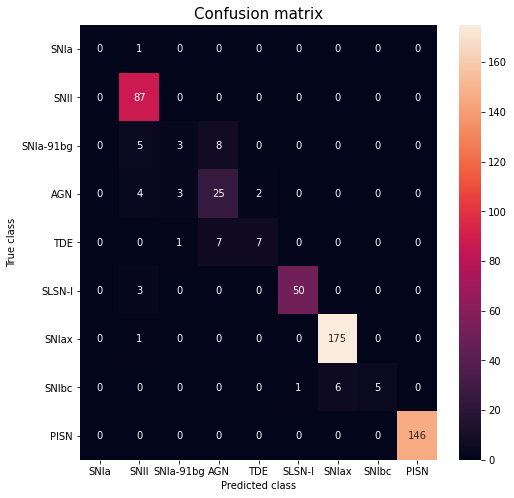

Objects predicted as PISN are really PISN 100.00 % of the time.
PISN are predicted as PISN 100.00 % of the time.


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classe_names=[]
for i in range(len(classes)):
    classe_names.append(target_dict.get(classes[i]))

# On calcul la matrice de confusion
conf_matrix = confusion_matrix(y_test, predic_test)

#On affiche la matrice de confusion
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=classe_names, yticklabels=classe_names, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title("Confusion matrix",fontsize=15)

plt.show()

posPISN=len(conf_matrix)-1
print('Objects predicted as PISN are really PISN %.2f %% of the time.'%(100*conf_matrix[posPISN,posPISN]/conf_matrix[:,posPISN].sum()))
print('PISN are predicted as PISN %.2f %% of the time.'%(100*conf_matrix[posPISN,posPISN]/conf_matrix[posPISN,:].sum()))